## Sequential Modeling

Romen Samuel Rodis Wabina <br>
Student, PhD Data Science in Healthcare and Clinical Informatics <br>
Clinical Epidemiology and Biostatistics, Faculty of Medicine (Ramathibodi Hospital) <br>
Mahidol University <br>

In [13]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
from keras import layers 

max_features = 20000
maxlen = 200

In [14]:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [17]:
(X_train, y_train), (X_val, y_val) = keras.datasets.imdb.load_data(num_words = max_features)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen = maxlen)
X_val   = keras.preprocessing.sequence.pad_sequences(X_val,   maxlen = maxlen)

In [20]:
inputs = keras.Input(shape = (None, ), dtype = 'int32')

x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional_8 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-tra

In [23]:
model.compile('adam', 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 2, validation_data = (X_val, y_val))

Epoch 1/2
196/196 [==============================] - 1073s 5s/step - loss: 0.2210 - accuracy: 0.9156 - val_loss: 0.3149 - val_accuracy: 0.8738
Epoch 2/2
196/196 [==============================] - 1204s 6s/step - loss: 0.1207 - accuracy: 0.9578 - val_loss: 0.4146 - val_accuracy: 0.8645


## Universal Sentence Encoder


In [26]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [27]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344464004039764, 0.00048085112939588726, 0.06595247983932495, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.016524311155080795, 0.015737788751721382, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833266742527485, -0.0558621808886528, -0.012941486202180386, ...]



In [28]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

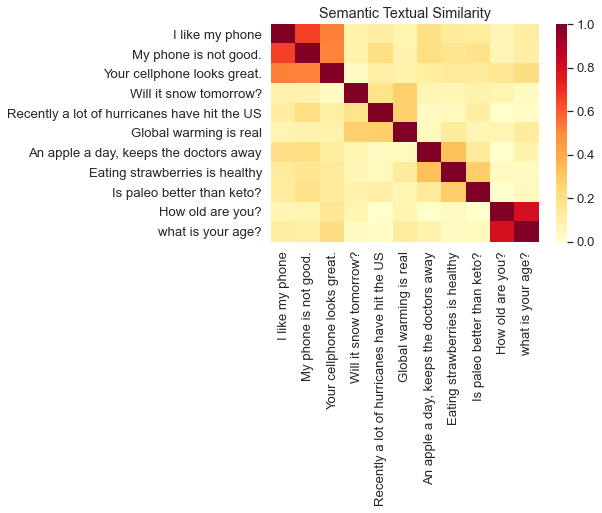

In [29]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)